In [14]:
import numpy as np
import matplotlib.pyplot as plt

#si units
Mearth = 5.97e24 
Rearth = 6371.0   
rho_Fe = 8000      
rho_Si_basic = 4000  

In [15]:
def calculate_radius(M_planet_earthmass, iron_mass_fraction, rho_Si=rho_Si_basic):
   
    M_planet = M_planet_earthmass * Mearth

    M_core = iron_mass_fraction * M_planet
    M_mantle = (1 - iron_mass_fraction) * M_planet

    Vol_core = M_core / rho_Fe
    Vol_mantle = M_mantle / rho_Si

    R_core = (3 * Vol_core / (4 * np.pi))**(1/3)
    R_planet = (R_core**3 + 3 * Vol_mantle / (4 * np.pi))**(1/3)

    return R_planet / (Rearth * 1e3)

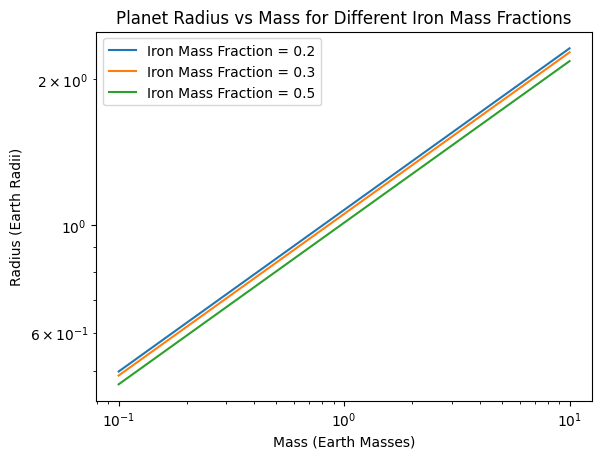

In [16]:
masses = np.logspace(-1, 1, 100)  #just for example for 0.1 to 10 Earth masses
iron_m_fractions = [0.2, 0.3, 0.5]

plt.figure()
for iron_mass_fraction in iron_m_fractions:
    radii = [calculate_radius(m, iron_mass_fraction) for m in masses]
    plt.plot(masses, radii, label=f'Iron Mass Fraction = {iron_mass_fraction}')
    
plt.xlabel('Mass (Earth Masses)')
plt.ylabel('Radius (Earth Radii)')
plt.title('Planet Radius vs Mass for Different Iron Mass Fractions')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [17]:
earth_predicted_radius = calculate_radius(1.0, 0.33)
print(f"Earth Radius predicted by model above: {earth_predicted_radius:.3f} Rearth")
print(f"Actual Earth Radius: 1.000 Rearth")
print(f"Difference: {((earth_predicted_radius - 1.0)/1) * 100:.2f}%")

Earth Radius predicted by model above: 1.048 Rearth
Actual Earth Radius: 1.000 Rearth
Difference: 4.78%


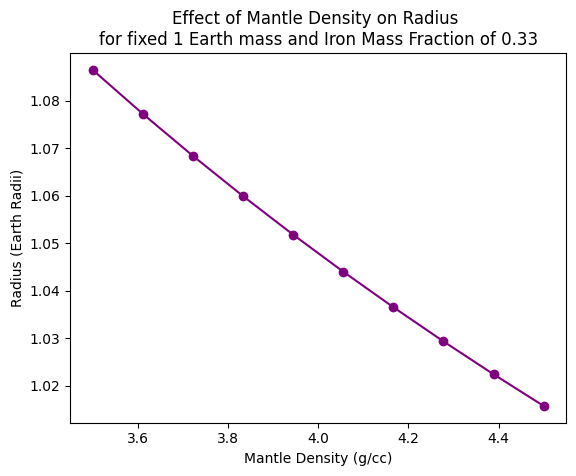

In [18]:
mantle_density_values = np.linspace(3500, 4500, 10)
radii_for_mantle_density_values = [calculate_radius(1.0, 0.33, rho) for rho in mantle_density_values]

plt.figure()
plt.plot(mantle_density_values / 1000, radii_for_mantle_density_values, 'o-', color='purple')
plt.xlabel('Mantle Density (g/cc)')
plt.ylabel('Radius (Earth Radii)')
plt.title('Effect of Mantle Density on Radius \nfor fixed 1 Earth mass and Iron Mass Fraction of 0.33')
plt.show()